In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv('glass.csv')

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.describe() # Me interesa que la desviacion sea grande. pa poder clusterizar

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8888b7ca90>,
      dtype=object)

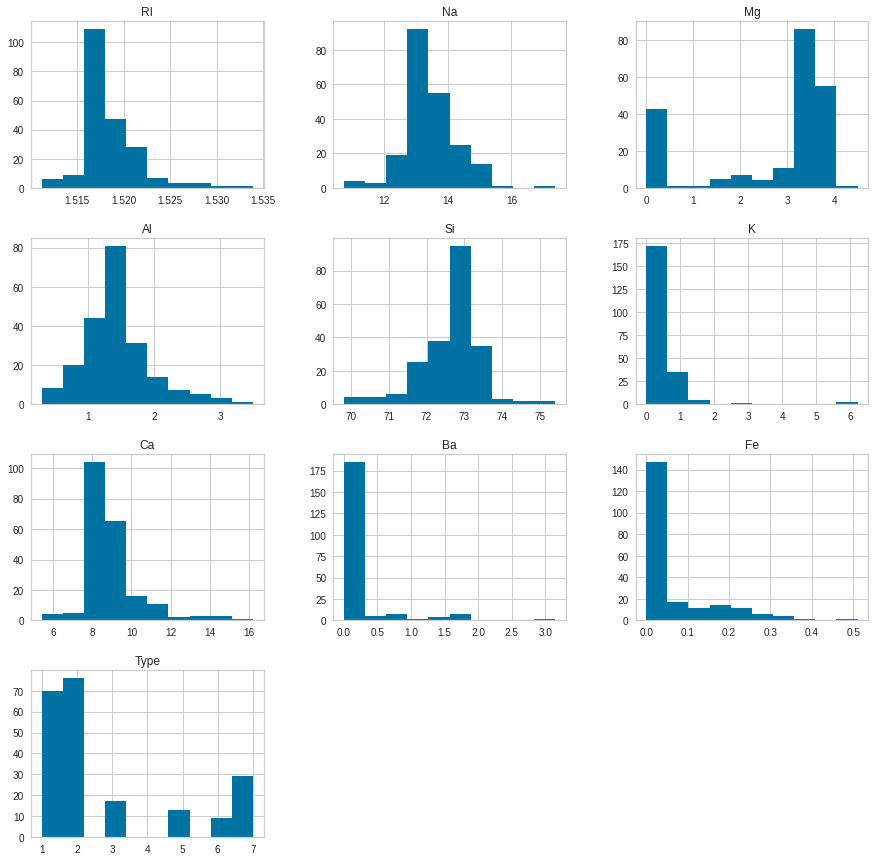

In [ ]:
df.hist(figsize = (15,15))

In [ ]:
df['ID']=df.index+1000

In [ ]:
df= df.drop(['Type'],axis=1)

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1000
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1001
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1002
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1003
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1004
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1209
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1210
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1211
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1212


In [ ]:
f=df.columns[:-1]
list(enumerate(f))

[(0, 'RI'),
 (1, 'Na'),
 (2, 'Mg'),
 (3, 'Al'),
 (4, 'Si'),
 (5, 'K'),
 (6, 'Ca'),
 (7, 'Ba'),
 (8, 'Fe')]

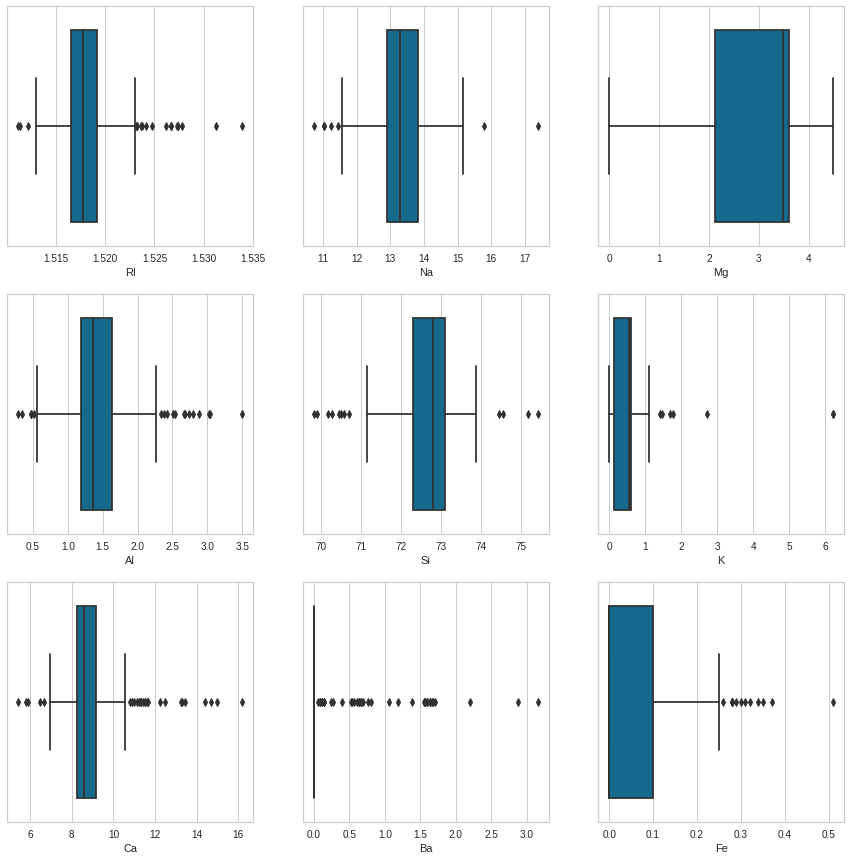

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(f):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1],data=df)

In [ ]:
for i in f:
  q1= df[i].quantile(0.01)
  q4= df[i].quantile(0.99)
  df[i][df[i]<=q1] =q1
  df[i][df[i]>=q4] =q4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss= StandardScaler()
df2 = ss.fit_transform(df.drop('ID',axis=1))

In [ ]:
df2 = pd.DataFrame(df2)

In [ ]:
df2.columns = df.columns[:-1]

In [ ]:
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.950549,0.319899,0.893132,-0.707909,-1.170586,-1.021903,-0.147013,-0.367626,-0.597741
1,-0.255286,0.647661,0.639148,-0.172494,0.112257,0.044327,-0.817870,-0.367626,-0.597741
2,-0.762446,0.175684,0.604337,0.198179,0.463350,-0.184151,-0.854329,-0.367626,-0.597741
3,-0.237553,-0.243851,0.701809,-0.316644,-0.049787,0.272804,-0.533485,-0.367626,-0.597741
4,-0.322671,-0.165188,0.653073,-0.419608,0.584883,0.222032,-0.642864,-0.367626,-0.597741
...,...,...,...,...,...,...,...,...,...
209,-0.744713,0.975423,-1.867270,2.957628,-0.049787,-0.971130,0.166539,1.972300,-0.597741
210,-0.524826,1.998040,-1.867270,1.124860,0.557876,-1.174222,-0.402230,3.142263,-0.597741
211,0.822872,1.263853,-1.867270,1.186638,1.044006,-1.174222,-0.373063,3.252637,-0.597741
212,-0.645409,1.290074,-1.867270,1.021895,1.300574,-1.174222,-0.343895,3.098113,-0.597741


In [ ]:
pip install pyclustertend

In [ ]:
from  pyclustertend import hopkins 

In [ ]:
hopkins(df2,df2.shape[0])
#Se puede aplicar aprendizae NO

0.16463115057404265

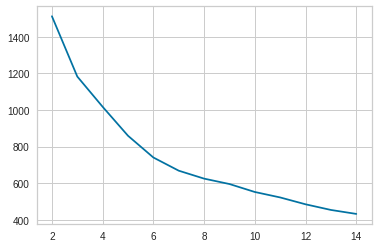

In [ ]:
ss=[]
for k in range(2,15):
  kmeans=KMeans(n_clusters=k).fit(df2)
  ss.append([k,kmeans.inertia_])
ss= pd.DataFrame(ss)
plt.plot(ss[0],ss[1])

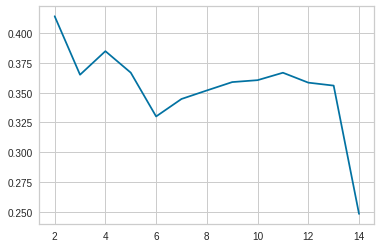

In [ ]:
si=[]
for k in range(2,15):
  kmeans=KMeans(n_clusters=k,random_state=0).fit(df2)
  si.append([k,silhouette_score(df2,kmeans.labels_)])
si=pd.DataFrame(si)
plt.plot(si[0],si[1])

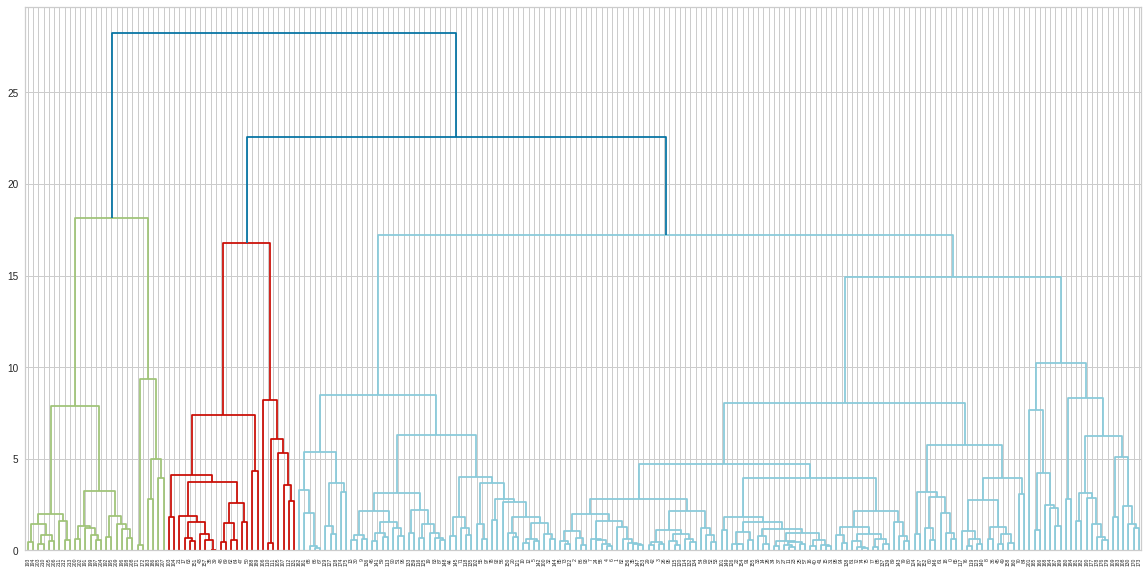

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sch.dendrogram(sch.linkage(df2, method= 'ward', metric='euclidean'),ax=ax)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit_transform(df2)

array([[2.0916283 , 4.81025806, 2.68856608],
       [3.20129373, 3.8223443 , 1.35382349],
       [3.60390538, 3.70926905, 1.26304251],
       [2.99560733, 4.25864894, 0.83584138],
       [3.27670404, 4.18377408, 0.95524644],
       [4.30929324, 4.99014376, 2.26373178],
       [3.24342999, 4.27257507, 1.03594113],
       [3.30067178, 4.4484607 , 1.21492825],
       [2.67295197, 4.08696295, 1.82608731],
       [3.12911791, 4.35509853, 0.65216935],
       [4.34159174, 4.93041899, 2.14456277],
       [3.16631384, 4.48074609, 0.94667559],
       [4.27065469, 4.9349856 , 2.10410406],
       [3.42715812, 4.67295576, 1.38081545],
       [3.41332136, 4.5513609 , 1.21896274],
       [3.31990258, 4.4577507 , 1.09308038],
       [3.18132088, 4.67721275, 1.18409468],
       [2.33049156, 5.20804774, 3.54754154],
       [2.23118543, 4.2291839 , 2.27697458],
       [3.13476595, 4.0249215 , 0.6430689 ],
       [3.30621203, 4.63727402, 1.44399935],
       [2.96823936, 5.1262088 , 3.6337233 ],
       [3.

In [ ]:
kmeans.labels_

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df['label'] = kmeans.labels_

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,label
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.00,0.0,1000,0
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.00,0.0,1001,2
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.00,0.0,1002,2
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.00,0.0,1003,2
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.00,0.0,1004,2
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.0000,2.88,72.61,0.08,9.18,1.06,0.0,1209,1
210,1.51685,14.92,0.0000,1.99,73.06,0.00,8.40,1.59,0.0,1210,1
211,1.52065,14.36,0.0000,2.02,73.42,0.00,8.44,1.64,0.0,1211,1
212,1.51651,14.38,0.0000,1.94,73.61,0.00,8.48,1.57,0.0,1212,1


In [ ]:
df['label'].value_counts()

2    134
0     51
1     29
Name: label, dtype: int64

In [ ]:
df.groupby('label')[['Ca','Fe', 'K','Mg']].mean()

,Ca,Fe,K,Mg
label,,,,
0,10.641780,0.061935,0.210392,2.226565
1,8.478138,0.013448,0.171724,0.353103
2,8.410806,0.063190,0.621443,3.359325


In [ ]:
df[df[ 'label']==0].ID

0      1000
17     1017
18     1018
21     1021
38     1038
39     1039
43     1043
47     1047
48     1048
50     1050
61     1061
62     1062
63     1063
64     1064
65     1065
66     1066
67     1067
68     1068
69     1069
103    1103
104    1104
105    1105
106    1106
107    1107
108    1108
109    1109
110    1110
111    1111
112    1112
127    1127
128    1128
129    1129
130    1130
131    1131
151    1151
157    1157
162    1162
165    1165
166    1166
167    1167
169    1169
170    1170
173    1173
175    1175
176    1176
177    1177
178    1178
183    1183
187    1187
188    1188
189    1189
Name: ID, dtype: int64

In [ ]:
from mp

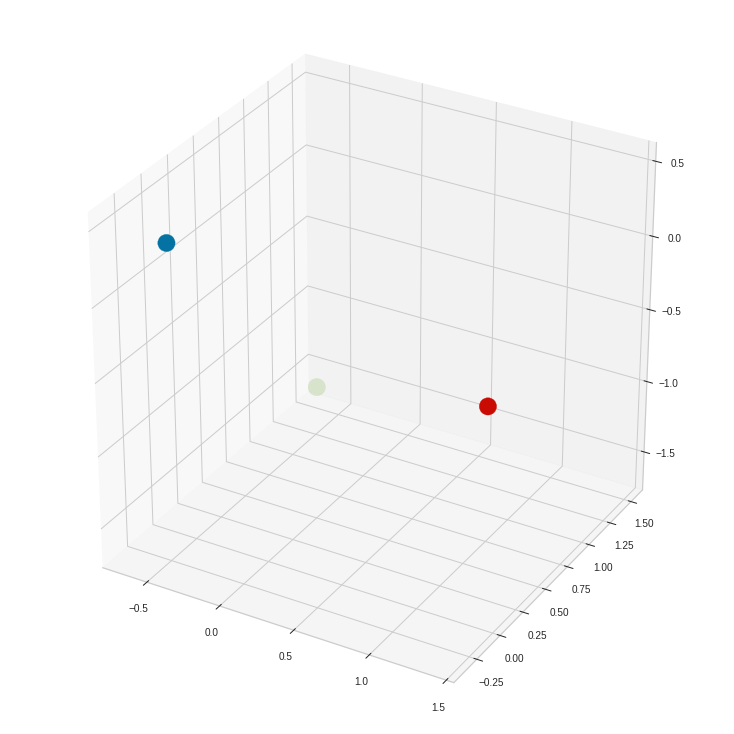

In [ ]:
colores = [ 'r', 'g', 'b']
centroides = kmeans.cluster_centers_
fig = plt.figure(figsize=(10,10))
ax= Axes3D(fig)
ax.scatter(centroides[:,0],centroides[:,1],centroides[:,2],c=colores,marker='o',s=300)